In [174]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import the warnings.
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
# Reading data
df_Leads= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Leads.csv")

In [177]:
df_Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [178]:
print(df_Leads.shape)

(9240, 37)


In [179]:
df_Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [180]:
df_Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Clean-up



In [181]:
## As seen in dataframe some columns have values as "Select" which surely coming from a default drop-down value for which visitor had not selected any value.
# Finding the columns having "Select" values
for cols in df_Leads.columns:
    if 'Select' in list(df_Leads[cols]):
        print(cols)

Specialization
How did you hear about X Education
Lead Profile
City


So above 4 columns have "Select" as values in them. These are as good as "NULL", will replace them with "NULL"

In [182]:
# Replacing "Select" value as Null in the above column
df_Leads['Specialization'].replace({'Select':None}, inplace=True)
df_Leads['How did you hear about X Education'].replace({'Select':None}, inplace=True)
df_Leads['Lead Profile'].replace({'Select':None}, inplace=True)
df_Leads['City'].replace({'Select':None}, inplace=True)

Now we will treat missing values.

In [183]:
## Finding columns which have more than 40% NULL values
columns_with_high_null = [col for col in df_Leads.columns if df_Leads[col].isna().sum() / len(df_Leads) > 0.3]
print(columns_with_high_null)

['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [184]:
### Dropping columns which have more than 30% NULL values
df_Leads1 = df_Leads.drop(columns=columns_with_high_null)

# Print Shape of Dataframe after drop
print("Shape after droping columns_with_high_null", df_Leads1.shape)

Shape after droping columns_with_high_null (9240, 27)


In [185]:
# Checking left Columns
df_Leads1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [186]:
df_Leads1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


Now let's see if Rows also have missing values.

In [187]:
# Count the number of rows Which have more than 50% missing values

print( (df_Leads1.isna().mean(axis=1) > 0.5).sum() )


0


So there are no rows which have more than 50% missing values, we will not be dropping any rows.

In [188]:
## Finding columns with NULL values in Percentage

null_percentage = (df_Leads1.isnull().mean() * 100).round(4)
null_percentage = null_percentage[null_percentage > 0]
print(null_percentage)

Lead Source                                       0.3896
TotalVisits                                       1.4827
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Country                                          26.6342
What is your current occupation                  29.1126
What matters most to you in choosing a course    29.3182
dtype: float64


In [189]:
## Checking Value counts in columns which have NULL Values in them.

columnsWithNULL= ["Lead Source", "TotalVisits", "Page Views Per Visit", "Last Activity", "Country", "What is your current occupation", "What matters most to you in choosing a course"]

for i in columnsWithNULL:
        percentage =100*df_Leads1[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(percentage,"\n")
        print("___" "\n")

value_counts % for : Lead Source 

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64 

___

value_counts % for : TotalVisits 

0.0      24.047017
2.0      18.455454
3.0      14.346919
4.0      12.303636
5.0       8.601560
6.0       5.119191
1.0       4.339229
7.0       3.394485
8.0       2.460727
9.0       1.801604
10.0      1.252334
11.0      0.944743
13.0      

"Country" ==> This column has 26.63 % NULL Values and approx 96% are chosen India.

"What is your current occupation" ==>  This column has 29.11 and more than 85% have chosen "Unemployed".

"What matters most to you in choosing a course"  ==> This column has  29.31 and 99.9% chosen "Betetr Career Prospects".

These 3 columns have highly skewed data and will not provide any additional insight for modeling. We can drop it.

In [190]:
df_Leads1.drop(["Country", "What is your current occupation", "What matters most to you in choosing a course"],axis=1,inplace=True)
print("After Drop now shape is : ", df_Leads1.shape)


After Drop now shape is :  (9240, 24)


"Lead Source"  ==> This column have more than 31% values as "Google" and only 0.38% NULL, we can impute NULL for this column with "Google"

"TotalVisits"  and "Page Views Per Visit"  ==> These are numerical column, Missing values in it can be imputed with mode.

"Last Activity"  ==> This column have only 1.11 % Missing values, to maintain sancity, we will put all missing values as "Others

In [191]:
# Imputing below two columns with specific values.
df_Leads1['Lead Source'].fillna('Google', inplace=True)
df_Leads1['Last Activity'].fillna('Others', inplace=True)

# Imputing with mode for below 2 columns.

df_Leads1['TotalVisits'].fillna(df_Leads1['TotalVisits'].mode()[0], inplace = True)
df_Leads1["Page Views Per Visit"].fillna(df_Leads1["Page Views Per Visit"].mode()[0], inplace = True)

In [192]:
## Checking again for NULL values in Percentage for columns

null_percentage = (df_Leads1.isnull().mean() * 100).round(4)
null_percentage = null_percentage[null_percentage > 0]
print(null_percentage)

print("After NULL Values imputation now shape is : ", df_Leads1.shape)


Series([], dtype: float64)
After NULL Values imputation now shape is :  (9240, 24)


Now no columns have NULL values in it.

**OUTLIER Treatment**

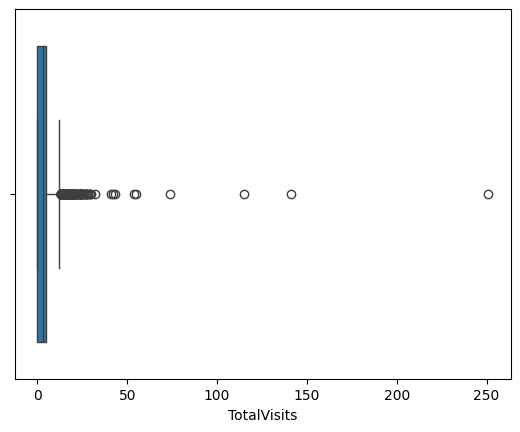

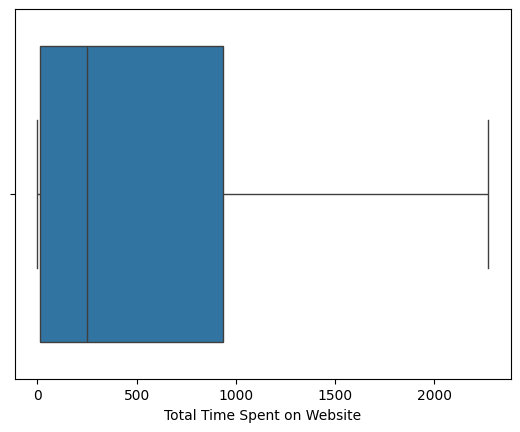

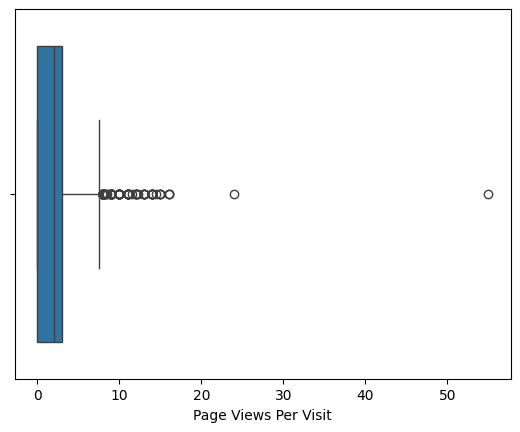

In [193]:
## Now we will find and remove Outliers from Important Numerical Columns
Outlier_Columns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in Outlier_Columns:
    sns.boxplot(x=df_Leads1[i])
    plt.show()

In [194]:
## A Function defined for Outlier treatment
def outlier_treatment(df,column):
    q1=df[column].describe()["25%"]
    q3=df[column].describe()["75%"]
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    print(column,lower_bound,upper_bound)
    df[column]=np.where(df[column]>upper_bound,upper_bound,df[column])
    if df[(df[column]<lower_bound)|(df[column]>upper_bound)][column].count() ==0:
        print("Outlier treatment is successful!!!")
    return df

Outlier_Columns_Handling = ['TotalVisits', 'Page Views Per Visit']

for i in Outlier_Columns:
  outlier_treatment(df_Leads1, i)

TotalVisits -7.5 12.5
Outlier treatment is successful!!!
Total Time Spent on Website -1374.0 2322.0
Outlier treatment is successful!!!
Page Views Per Visit -4.5 7.5
Outlier treatment is successful!!!



We've observed outliers in the "TotalVisits" and "Page Views Per Visit" columns, while "Total Time Spent on Website" doesn't exhibit any outliers.
Let's proceed to eliminate the outliers from these columns, considering the 10th and 90th percentiles

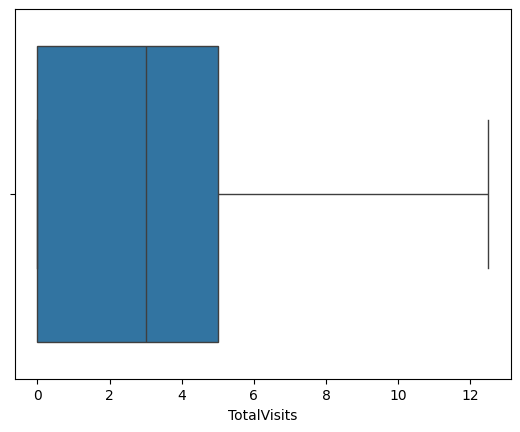

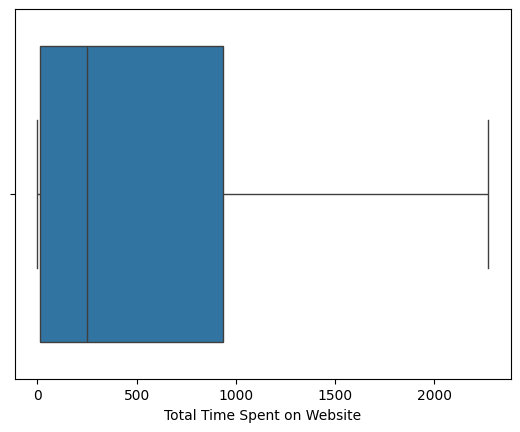

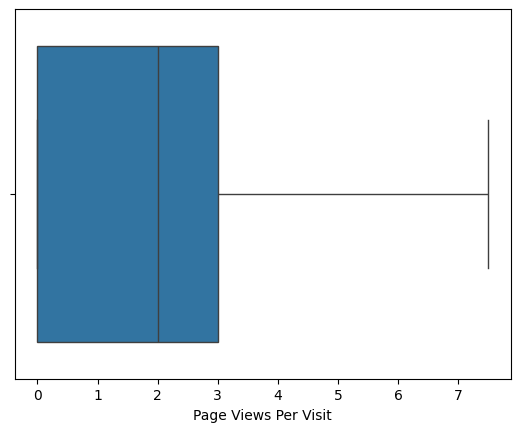

After outlier treatment now shape is :  (9240, 24)


In [195]:
## Now check again for outliers in Numerical columns
for i in Outlier_Columns:
    sns.boxplot(x=df_Leads1[i])
    plt.show()



print("After outlier treatment now shape is : ", df_Leads1.shape)



There are no Outliers left for these columns.

# Data prepration for Modeling

Finding out Columns with Skewed values stored in it.


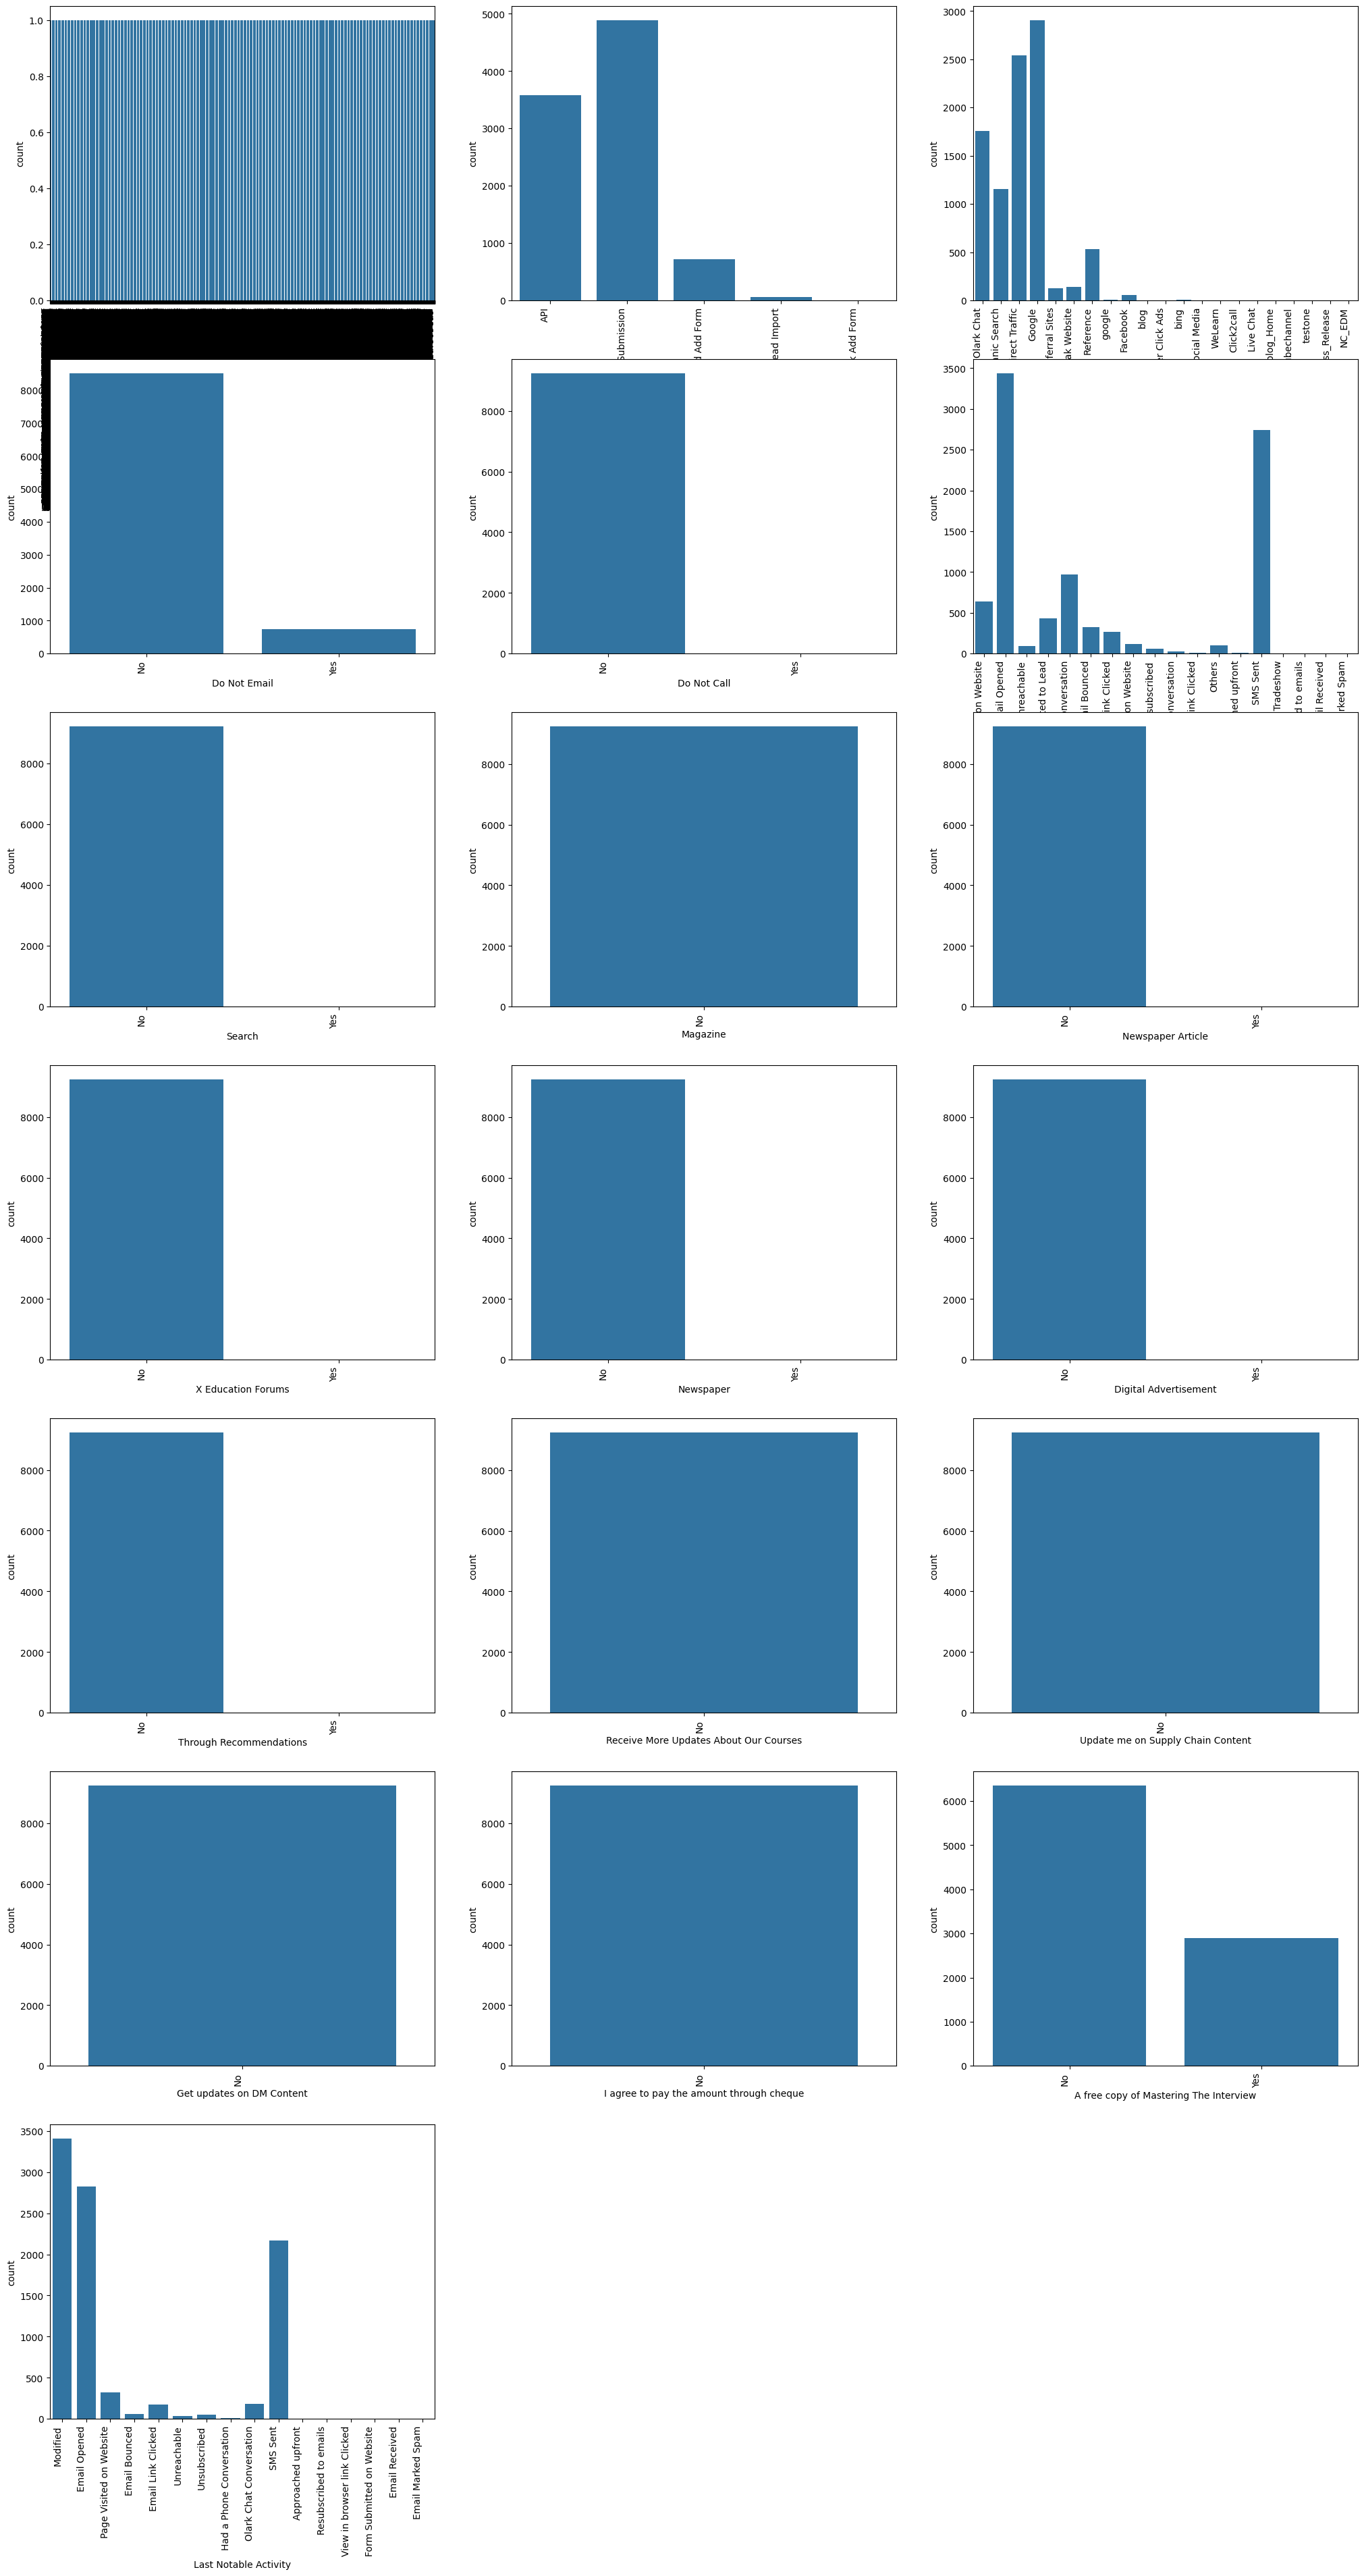

In [196]:
# Creating count plot for categorical columns for Analysis
categorical_col = df_Leads1.select_dtypes(include=['category', 'object']).columns.tolist()

plt.figure(figsize=(25,60))
i=0
for category in categorical_col:
    i = i+1
    ra = plt.subplot(9,3,i)
    sns.countplot(x = category, data=df_Leads1, orient='v')
    ra.set_xticklabels(ra.get_xticklabels(), rotation = 90, horizontalalignment='right')

**Following columns have data which is highly skewed :**

'Do Not Email',

'Do Not Call',

'Search',

'Magazine'

'Newspaper Article',

'X Education Forums',

'Newspaper',

'Digital Advertisement',

'Through Recommendations',

'Receive More Updates About Our Courses',

'Update me on Supply Chain Content',

'Get updates on DM Content',

'I agree to pay the amount through cheque'






Therefore, these columns will be excluded from the model as they do not contribute meaningfully. Additionally, skewed variables have the potential to impact the effectiveness of logistic regression models by introducing bias or inaccuracies in parameter estimates.

In [197]:
# Dropping categorical columns with highly skewed data

print("Before Drop shape of dataframe : ", df_Leads1.shape)
df_Leads1.drop(['Do Not Email','Do Not Call','Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'],axis=1,inplace=True)
print("After Drop shape of dataframe : ", df_Leads1.shape)

Before Drop shape of dataframe :  (9240, 24)
After Drop shape of dataframe :  (9240, 11)


In [198]:
df_Leads1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0.0,0.0,Page Visited on Website,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674.0,2.5,Email Opened,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532.0,2.0,Email Opened,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305.0,1.0,Unreachable,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428.0,1.0,Converted to Lead,No,Modified


In [199]:
## Checking the value counts of the categorical columns

df_Leads1['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [200]:
df_Leads1['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [201]:
# Seems "Google" and "google" are getting considered as different values.
# Renaming "google" to "Google"
df_Leads1['Lead Source'] = df_Leads1['Lead Source'].replace('google', 'Google')

In [202]:
# Also "Lead Source" column has few values which are very low in count, e.g. bing, Click2Call, testone, blog, etc etc.
# We will group all such values as "Others"

df_Leads1 = df_Leads1.replace({'Lead Source': {'Facebook':'Other', 'bing':'Other', 'Click2call':'Other', 'Press_Release':'Other', 'Social Media':'Other', 'Live Chat':'Other', 'youtubechannel':'Other',
                                               'testone':'Other', 'Pay per Click Ads':'Other', 'welearnblog_Home':'Other', 'WeLearn':'Other', 'blog':'Other', 'NC_EDM':'Other'  }})

In [203]:
# Lets check count again for Lead Scource
df_Leads1['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other                 78
Name: Lead Source, dtype: int64

In [204]:
## Column - "Last Activity"
df_Leads1['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Others                           103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Furthermore, it's noticeable in the 'Last Activity' column that certain values, such as "Resubscribed to emails" occur infrequently.

To streamline the analysis, we're consolidating these unique values under the category "Others"

In [205]:
# Consolidating the lower counts values as "Other"
df_Leads1 = df_Leads1.replace({'Last Activity':{'Had a Phone Conversation':'Others', 'Approached upfront':'Others', 'View in browser link Clicked':'Others',
                                  'Email Received':'Others', 'Email Marked Spam':'Others',  'Visited Booth in Tradeshow':'Others', 'Resubscribed to emails':'Others'}})

In [206]:
# Checking again
df_Leads1['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        154
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Name: Last Activity, dtype: int64

In [207]:
## Column - "Last Notable Activity"

df_Leads1['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [208]:
# In similar lines Consolidating the lower counts values as "Other"  for Column - "Last Notable Activity"

df_Leads1 = df_Leads1.replace({'Last Notable Activity':{'Unreachable':'Other', 'Had a Phone Conversation':'Other', 'Email Marked Spam':'Other', 'Approached upfront':'Other', 'Resubscribed to emails':'Other',
                                         'View in browser link Clicked':'Other', 'Form Submitted on Website':'Other', 'Email Received':'Other' }})

# Check count again after consolidation
df_Leads1['Last Notable Activity'].value_counts()


Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Email Bounced                60
Other                        53
Unsubscribed                 47
Name: Last Notable Activity, dtype: int64

In [209]:
# Converting "A free copy of Mastering The Interview" column from Yes/No to Binary 1/0

df_Leads1['A free copy of Mastering The Interview'] = df_Leads1['A free copy of Mastering The Interview'].apply(lambda x: 1 if x == 'Yes' else 0)


In [210]:
df_Leads1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0.0,0.0,Page Visited on Website,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674.0,2.5,Email Opened,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532.0,2.0,Email Opened,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305.0,1.0,Unreachable,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428.0,1.0,Converted to Lead,0,Modified


Now will create DUMMY variables for categotical columns

In [211]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy = pd.get_dummies(df_Leads1[["Lead Origin","Lead Source","Last Activity","Last Notable Activity"]], drop_first=True)

# Adding the results to the master dataframe

df_Leads1 = pd.concat([df_Leads1, dummy], axis=1)

df_Leads1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0.0,0.0,Page Visited on Website,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674.0,2.5,Email Opened,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532.0,2.0,Email Opened,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305.0,1.0,Unreachable,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428.0,1.0,Converted to Lead,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [212]:
# As we have created dummy variables for the below columns, so we can drop them
df_Leads1 = df_Leads1.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'], axis=1)

print(df_Leads1.shape)
df_Leads1.head()

(9240, 36)


,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674.0,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532.0,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428.0,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [213]:
# Checking the Lead converted rate
print ( 'Lead Conversion Rate :',  round(((sum(df_Leads1['Converted'])/len(df_Leads1.index))*100),2))

Lead Conversion Rate : 38.54


Finally our dataset comprises of 36 Columns.

# Test-Train Split


In [214]:
# Importing necessary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE                  # Importing RFE
from sklearn.preprocessing import StandardScaler           # Standardization method
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import statsmodel
import statsmodels.api as sm

In [215]:
# Putting feature variables to X
# At same time we dropping un-necessary column 'Prospect ID' and 'Lead Number' as well as it's not significant in model building.

X = df_Leads1.drop(['Prospect ID', 'Lead Number', 'Converted'], axis=1)

# Putting Target variables to y

y = df_Leads1["Converted"]


In [216]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,5.0,674.0,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,1532.0,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1.0,305.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,2.0,1428.0,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [217]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [218]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print("X_train:", X_train.shape,"\ny_train:",y_train.shape)
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)


X_train: (6468, 33) 
y_train: (6468,)
X_test: (2772, 33) 
y_test: (2772,)


# Feature Scaling

In [219]:
# Instantiate the scaler
scaler = StandardScaler()

# Sclaing Numeric variables.

X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

# X-train dataframe after standard scaling

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
1871,-1.064974,-0.885371,-1.184892,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6795,0.262370,0.005716,-0.488713,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3516,0.594206,-0.691418,0.123715,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8105,0.594206,1.365219,1.432322,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3934,-1.064974,-0.885371,-1.184892,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


**Correlation Matrix :**

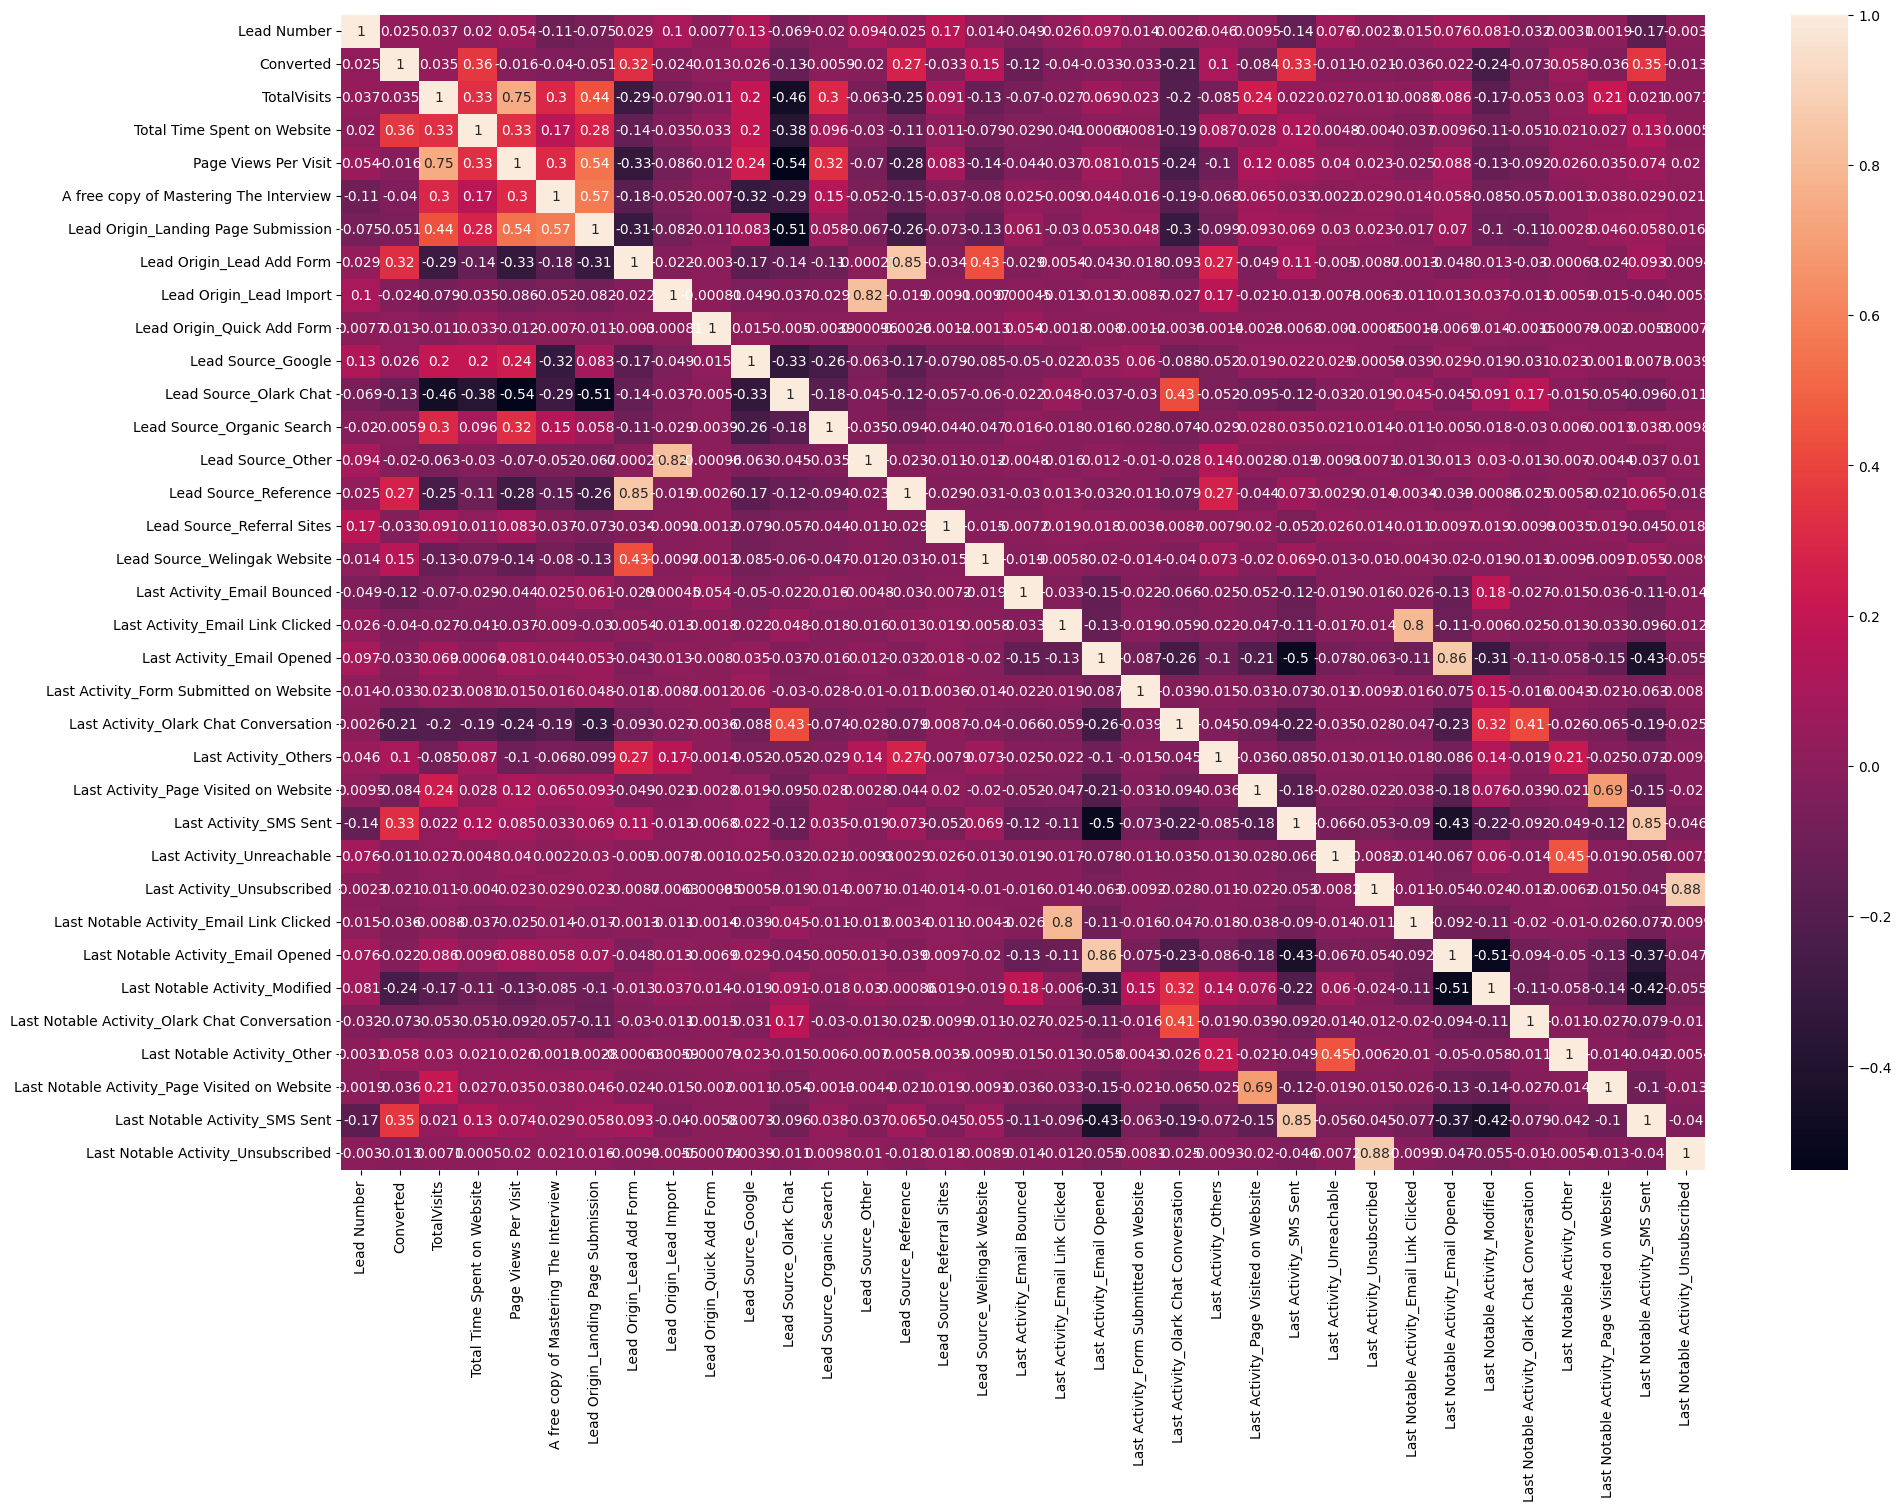

In [220]:
# Correlation matrix

plt.figure(figsize=(22,15))
sns.heatmap(df_Leads1.corr(), annot=True)
plt.show()

Highly correlated variables:

................................................

'Lead Origin_Lead Add Form' And 'Lead Source_Reference' correlation = 0.85

'Lead Origin_Lead Import' And  'Lead Source_Other' correlation = 0.82

'Last Notable Activity_Email Link Clicked' And 'Last Activity_Email Link Clicked' correlation = 0.8

'Last Notable Activity_Email Opened' And 'Last Activity_Email Opened' correlation = 0.86

'Last Notable Activity_SMS Sent' And 'Last Activity_SMS Sent' correlation = 0.85

'Last Notable Activity_Unsubscribed' And 'Last Activity_Unsubscribed' correlation = 0.88

**We will drop highly correlated variables, one from each pair.**

In [221]:
# Dropping from train set
X_train = X_train.drop(['Lead Origin_Lead Add Form', 'Lead Source_Other', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Opened',
                        'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed'], axis=1)

# Dropping from test set
X_test = X_test.drop(['Lead Origin_Lead Add Form', 'Lead Source_Other', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Opened',
                      'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed'], axis=1)

In [222]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (6468, 27)
X_test: (2772, 27)


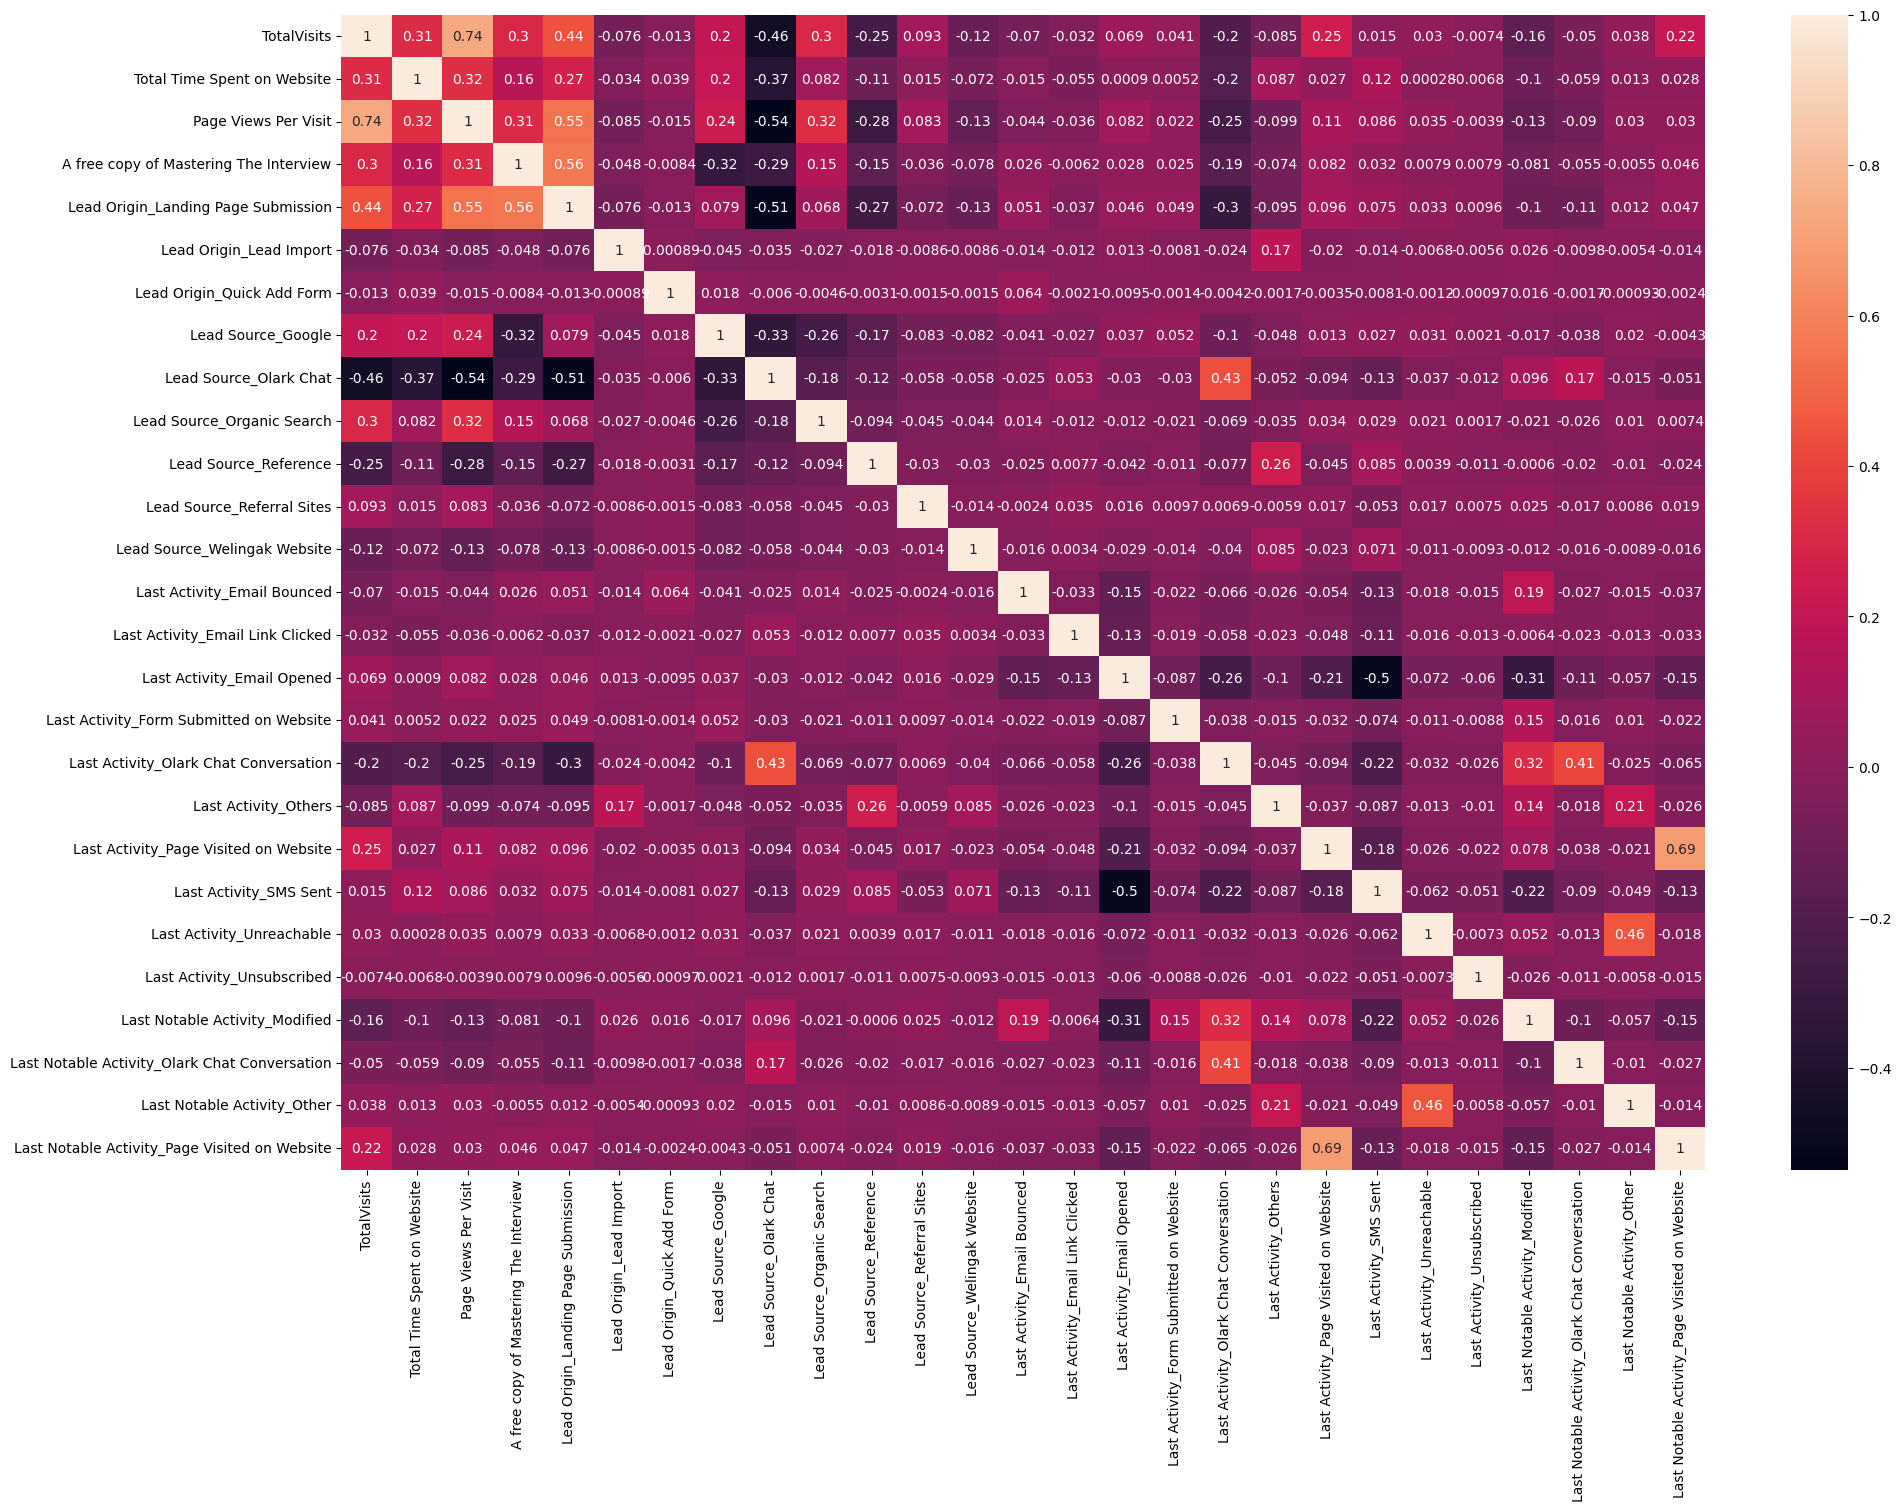

In [223]:
# Checking correlation again:
plt.figure(figsize=(22,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

Now set don't have very highly correlated variables.

# Model Building

**Model-1**

In [224]:
# Instantiate logistice regression model
logreg = LogisticRegression()

# Instantiate the model
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())

# Fit the model
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2874.1
Date:                Sun, 18 Feb 2024   Deviance:                       5748.2
Time:                        08:47:10   Pearson chi2:                 6.67e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3564
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4936      0.249     -6.010      0.000      -1.981      -1.006
TotalVisits                                       0.3059      0.050      6.063      0.000       0.207       0.405
Total Time Spent on Website                       1.0980      0.038     28.616      0.000       1.023       1.173
Page Views Per Visit                             -0.2829      0.056     -5.066      0.000      -0.392      -0.173
A free copy of Mastering The Interview           -0.0364      0.100     -0.365      0.715      -0.232       0.159
Lead Origin_Landing Page Submission              -0.1627      0.101     -1.609      0.108      -0.361       0.036
Lead Origin_Lead Import                          -0.1170      0.535     -0.219      0.827      -1.165       0.931
Lead Origin_Quick Add Form                       20.0568   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                                0.3519      0.106      3.311      0.001       0.144       0.560
Lead Source_Olark Chat                            1.0799      0.152      7.101      0.000       0.782       1.378
Lead Source_Organic Search                        0.1010      0.122      0.825      0.410      -0.139       0.341
Lead Source_Reference                             4.0241      0.234     17.170      0.000       3.565       4.483
Lead Source_Referral Sites                        0.1002      0.300      0.334      0.738      -0.488       0.688
Lead Source_Welingak Website                      5.3611      0.735      7.296      0.000       3.921       6.801
Last Activity_Email Bounced                      -1.0039      0.351     -2.863      0.004      -1.691      -0.317
Last Activity_Email Link Clicked                  0.0580      0.296      0.196      0.845      -0.522       0.639
Last Activity_Email Opened                        0.4913      0.225      2.185      0.029       0.051       0.932
Last Activity_Form Submitted on Website           0.4637      0.371      1.251      0.211      -0.263       1.190
Last Activity_Olark Chat Conversation            -0.4751      0.270     -1.763      0.078      -1.003       0.053
Last Activity_Others                              0.8465      0.422      2.006      0.045       0.019       1.674
Last Activity_Page Visited on Website             0.0969      0.288      0.337      0.736      -0.467       0.661
Last Activity_SMS Sent                            1.6294      0.223      7.293      0.000       1.191       2.067
Last Activity_Unreachable                        -0.4976      0.572     -0.870      0.385      -1.619       0.624
Last Activity_Unsubscribed                        0.2076      0.462      0.450      0.653      -0.698       1.113
Last 

**Analysis of the Model:**

Observing the model analysis reveals a mix of positive and negative coefficients across various features. Additionally, several features exhibit higher p-values, rendering them insignificant in the model.


**Coarse Tuning (Auto+Manual):**

Our coarse tuning approach involves initial feature reduction using Recursive Feature Elimination (RFE).

Following this automated process, we'll proceed with manual feature elimination, where we'll assess p-values and Variance Inflation Factors (VIFs) to further refine the feature set.

**Feature Selection Using RFE (Recursive Feature Elimination)**



In [225]:
# Instantiate logistice regression model
logreg = LogisticRegression()

# Instantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)


# Fit the train set
rfe = rfe.fit(X_train, y_train)

In [226]:
# Listing the feature variables with their RFE status and rank
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 9),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 11),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 7),
 ('Last Activity_Unsubscribed', False, 8),
 ('La

In [227]:
# RFE selected columns
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other'],
      dtype='object')

In [228]:
# RFE not selected columns
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

**Model-2**

With all RFE variables.

In [229]:
# Adding constant to X_train
X_train_sm = sm.add_constant(X_train[rfe_col])

# Instantiate the model
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()

print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2900.7
Date:                Sun, 18 Feb 2024   Deviance:                       5801.3
Time:                        08:47:12   Pearson chi2:                 6.64e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3511
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [230]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [231]:
calculateVIF(X_train_sm)

,Features,VIF
0,const,9.91
8,Last Activity_Email Opened,2.45
12,Last Activity_SMS Sent,2.32
10,Last Activity_Olark Chat Conversation,2.04
13,Last Notable Activity_Modified,1.61
4,Lead Source_Olark Chat,1.60
14,Last Notable Activity_Olark Chat Conversation,1.33
11,Last Activity_Others,1.27
1,Total Time Spent on Website,1.26
3,Lead Source_Google,1.22


**NOTE :** "Lead Origin_Quick Add Form" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.

No variable needs to be dropped on basis of VIF as none have VIF values less than 5.

**Model-3**

In [232]:
# Dropping 'Lead Origin_Quick Add Form' column

X_train_new = X_train_sm.drop(['Lead Origin_Quick Add Form'], axis = 1)

In [233]:
# Constructing 3rd logistic regression model

logm3 = sm.GLM(y_train, X_train_new, family = sm.families.Binomial()).fit()

print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2901.2
Date:                Sun, 18 Feb 2024   Deviance:                       5802.4
Time:                        08:47:12   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3510
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

"Last Activity_Form Submitted on Website" have p-Value of 0.150 > 0.05. Now we will drop this feature.

**Model-4**

In [234]:
# Dropping 'Last Activity_Form Submitted on Website' column

X_train_new = X_train_new.drop(['Last Activity_Form Submitted on Website'], axis = 1)

# Constructing 4th logistic regression model

logm4 = sm.GLM(y_train, X_train_new, family = sm.families.Binomial()).fit()

print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2902.2
Date:                Sun, 18 Feb 2024   Deviance:                       5804.4
Time:                        08:47:12   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3508
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

"Last Notable Activity_Olark Chat Conversation" have p-Value of 0.1 > 0.05, will drop this feature now.

**Model-5**

In [235]:
# Dropping 'Last Notable Activity_Olark Chat Conversation' column

X_train_new = X_train_new.drop(['Last Notable Activity_Olark Chat Conversation'], axis = 1)

# Constructing 5th logistic regression model

logm5 = sm.GLM(y_train, X_train_new, family = sm.families.Binomial()).fit()

print(logm5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2903.6
Date:                Sun, 18 Feb 2024   Deviance:                       5807.2
Time:                        08:47:13   Pearson chi2:                 6.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3505
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

**NOTE:** Model 5 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.



In [236]:
calculateVIF(X_train_new)

,Features,VIF
0,const,9.44
7,Last Activity_Email Opened,2.34
10,Last Activity_SMS Sent,2.23
8,Last Activity_Olark Chat Conversation,1.72
3,Lead Source_Olark Chat,1.60
11,Last Notable Activity_Modified,1.44
1,Total Time Spent on Website,1.26
9,Last Activity_Others,1.26
2,Lead Source_Google,1.22
4,Lead Source_Reference,1.21


NOTE :
Model 5 have p-values for all featured within threshold (< 0.05).

It have all VIFs also less than acceptable range <5.

Model-5 can be used as "Model for evaluation".

# Model Evaluation

We will evaluate model with :

> Confusion Matrix

> Accuracy

> Sensitivity and Specificity

> Threshold determination using ROC & Finding Optimal cutoff point

> Precision and Recall







In [237]:
# Getting the predicted values on the train set

y_train_pred = logm5.predict(X_train_new)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.293806
6795    0.244587
3516    0.339863
8105    0.861461
3934    0.157427
4844    0.881272
3297    0.126118
8071    0.911465
987     0.154468
7423    0.923919
dtype: float64

Creating a dataframe with the actual converted and the predicted probabilities

In [238]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred.values})

# Assigning Prospect ID for each records
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.293806,1871
1,0,0.244587,6795
2,0,0.339863,3516
3,0,0.861461,8105
4,0,0.157427,3934


**Finding Optimal Probablity Cutoff Point**

In [239]:
# Let's create columns with different probability cutoffs
numbers = [float(x/10) for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Converted_Prob'].map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.293806,1871,1,1,1,0,0,0,0,0,0,0
1,0,0.244587,6795,1,1,1,0,0,0,0,0,0,0
2,0,0.339863,3516,1,1,1,1,0,0,0,0,0,0
3,0,0.861461,8105,1,1,1,1,1,1,1,1,1,0
4,0,0.157427,3934,1,1,0,0,0,0,0,0,0,0


**Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.**

In [240]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

df_cutoff = pd.DataFrame(columns=['Probability','Accuracy','Sensitivity','Specificity'])


# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    df_cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(df_cutoff)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.566636     0.970397     0.317841
0.2          0.2  0.706092     0.914842     0.577461
0.3          0.3  0.783859     0.825629     0.758121
0.4          0.4  0.798547     0.744931     0.831584
0.5          0.5  0.799784     0.666667     0.881809
0.6          0.6  0.778139     0.552311     0.917291
0.7          0.7  0.758194     0.461071     0.941279
0.8          0.8  0.729437     0.345093     0.966267
0.9          0.9  0.681509     0.184104     0.988006


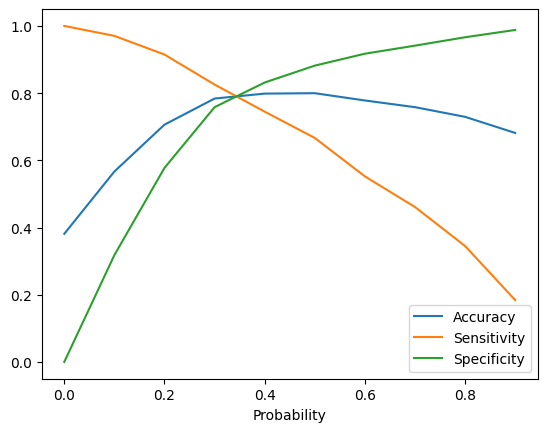

In [241]:
# Plotting accuracy, sensitivity and specificity for various probabilities.
df_cutoff.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])

plt.show()

**Interpretation from above curve :**

Accuracy - Becomes stable after 0.35

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

 At the intersection point of 0.35, where these metrics converge, a balance is evident between sensitivity and specificity, yielding a favorable accuracy.

Therefore, 0.35 emerges as a potential optimal cutoff.



In [242]:
# Lets do mapping again using optimal cutoff point

y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.35 else 0)

# Removing unwanted columns from dataframe

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.293806,1871,0
1,0,0.244587,6795,0
2,0,0.339863,3516,0
3,0,0.861461,8105,1
4,0,0.157427,3934,0


**Confusion Matrix and Accuracy**

In [243]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print(confusion)

[[3180  822]
 [ 522 1944]]


In [244]:
# Predicted        not_converted  converted
# Actual
# not_converted        3180          822
# converted            522           1944

**Accuracy:**

In [245]:
# Checking the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

0.7922077922077922


So using the confusion matrix, we got an accuracy of about 79%, which seems to be a good number.

**Sensitivity & Specificity**

In [246]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

**Sensitivity (Number of correctly predicted YES)**

In [247]:
# Let's calculate  sensitivity
print ("Sensitivity : ", TP / float(TP+FN) )

Sensitivity :  0.7883211678832117


**Specificity (Number of correctly predicted NOs)**

In [248]:
# Let us calculate specificity
print ("Specificity : ", TN / float(TN+FP))

Specificity :  0.7946026986506747


**False postive rate**

In [249]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.20539730134932535


**Analysis**

*So our model seems to have Good accuracy (>79%), Good specificity (>79%) and Good sensitivity (>79%).*

# Creating Lead Score


> Creating a column called Lead Score by multplying the converted probablity with 100.

Lead Score = (Converted_Prob) X 100



In [250]:
# Creating Lead Score column
y_train_pred_final['Lead Score'] = round((y_train_pred_final['Converted_Prob']*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead Score
0,0,0.293806,1871,0,29.0
1,0,0.244587,6795,0,24.0
2,0,0.339863,3516,0,34.0
3,0,0.861461,8105,1,86.0
4,0,0.157427,3934,0,16.0


**The customers with Lead Score more than 35 will be considered as "Hot Lead" we decided to have the optimal probablity cutoff is 0.35.**

**Higher the Lead Score, higher the chance of the customers to be converted.**

Finding the average Lead Score of the predicted converted leads.

In [251]:
# Creating dataframe for predicted converted leads
y_train_pred_converted = y_train_pred_final[y_train_pred_final['final_predicted']==1]
y_train_pred_converted.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead Score
3,0,0.861461,8105,1,86.0
5,1,0.881272,4844,1,88.0
7,1,0.911465,8071,1,91.0
9,1,0.923919,7423,1,92.0
10,1,0.852366,1032,1,85.0


In [252]:
# Average Lead Score of the predicted converted leads
avg_converted = round(sum(y_train_pred_converted['Lead Score'])/len(y_train_pred_converted.index))
avg_converted

69

So average Lead Score of the customers, who were converted is 69.

**Finding the average Lead Score of the predicted not converted leads**

In [253]:
# Creating dataframe for predicted not converted leads
y_train_pred_not_converted = y_train_pred_final[y_train_pred_final['final_predicted']==0]
y_train_pred_not_converted.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead Score
0,0,0.293806,1871,0,29.0
1,0,0.244587,6795,0,24.0
2,0,0.339863,3516,0,34.0
4,0,0.157427,3934,0,16.0
6,0,0.126118,3297,0,13.0


In [254]:
# Average Lead Score of the predicted not converted leads
avg_not_converted = round(sum(y_train_pred_not_converted['Lead Score'])/len(y_train_pred_not_converted.index))
avg_not_converted

15

So average Lead Score of the customers, who were not converted is 15.

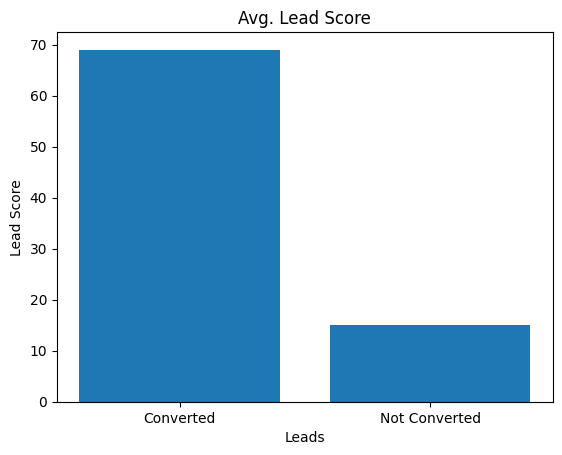

In [255]:
# Creating Bar plot for Converted Vs Not Converted
plt.bar(['Converted', 'Not Converted'], [avg_converted, avg_not_converted])
plt.xlabel('Leads')
plt.ylabel('Lead Score')
plt.title('Avg. Lead Score')
plt.show()

**Plotting the ROC Curve (Trade off between sensitivity & specificity)**

In [256]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [257]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'], drop_intermediate = False )

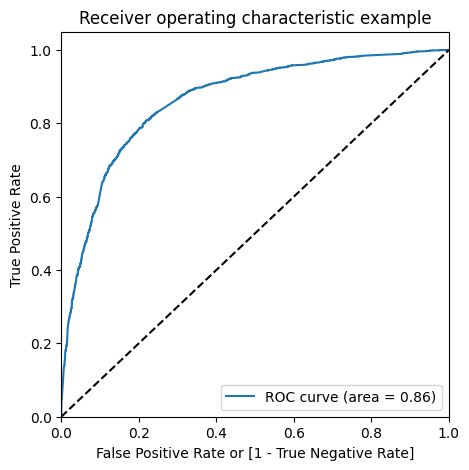

In [258]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

NOTE: Area under ROC curve is 0.86 out of 1 which indicates a good predictive model, this is also Gini of the model.

# Testing the model

In [259]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website
4269,8.0,1011.0,7.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2376,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7766,5.0,59.0,5.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
9199,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4359,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [260]:
# Scaling the test set
#We don't fit scaler on the test set. We only transform the test set.

X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website
4269,1.589714,0.964504,2.740929,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2376,-1.064974,-0.885371,-1.184892,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7766,0.594206,-0.777416,1.432322,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
9199,-1.064974,-0.885371,-1.184892,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4359,-1.064974,-0.885371,-1.184892,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


**Modeling test set with final model logm5**

In [261]:
X_test.shape

(2772, 27)

In [262]:
X_train_new.shape

(6468, 13)

**Statsmodel for the test set with the final model logm5**

In [270]:
# Taking only the columns, which were in the final train set

column_list = X_train_new.columns.tolist()
column_list.remove('const')
print(column_list)


['Total Time Spent on Website', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Last Activity_SMS Sent', 'Last Notable Activity_Modified', 'Last Notable Activity_Other']


In [273]:
X_test = X_test[column_list]
X_test.head()

,Total Time Spent on Website,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Other
4269,0.964504,0,0,0,0,0,0,0,0,1,0,0
2376,-0.885371,0,0,1,0,0,0,0,0,1,0,0
7766,-0.777416,1,0,0,0,0,0,0,0,0,0,1
9199,-0.885371,0,1,0,0,0,0,1,0,0,1,0
4359,-0.885371,0,0,1,0,0,1,0,0,0,0,0


In [274]:
# Add constant
X_test_sm = sm.add_constant(X_test)

In [275]:
# Predictions on the test set with the final model logm5
y_test_pred = logm5.predict(X_test_sm)

In [276]:
y_test_pred.head()

4269    0.734506
2376    0.958235
7766    0.495035
9199    0.058375
4359    0.885036
dtype: float64

In [277]:
# Changing to dataframe of predicted probability

y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.734506
2376,0.958235
7766,0.495035
9199,0.058375
4359,0.885036


In [278]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [279]:
# Putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side

y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred

y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.734506
1,1,2376,0.958235
2,1,7766,0.495035
3,0,9199,0.058375
4,1,4359,0.885036


In [280]:
# Renaming the column

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.734506
1,2376,1,0.958235
2,7766,1,0.495035
3,9199,0,0.058375
4,4359,1,0.885036


In [287]:
# taking sensitivity-specificity method at 0.35 probability cutoff during training

y_pred_final['test_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,test_predicted
0,4269,1,0.734506,1
1,2376,1,0.958235,1
2,7766,1,0.495035,1
3,9199,0,0.058375,0
4,4359,1,0.885036,1


**Assigning Lead Score to Test Data Set**

In [288]:
# Creating Lead Score column
y_pred_final['Lead Score'] = round((y_pred_final['Converted_Prob']*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,test_predicted,Lead Score
0,4269,1,0.734506,1,73.0
1,2376,1,0.958235,1,96.0
2,7766,1,0.495035,1,50.0
3,9199,0,0.058375,0,6.0
4,4359,1,0.885036,1,89.0


**Calculating all metrics for Test set**

**Confusion Matrix for Test Set**

In [289]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['test_predicted'])
confusion2

array([[1342,  335],
       [ 233,  862]])

In [290]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

**Accuracy (For Test Set)**

In [291]:
# Let's check the overall accuracy of the test set
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['test_predicted'])

0.7950937950937951

**Sensitivity (For Test Set)**

In [292]:
# Sensitivity of the test set
TP / float(TP+FN)

0.7872146118721461

**Specificity (For Test Set)**

In [293]:
# Specificity for the test set
TN / float(TN+FP)

0.8002385211687537

# Conclusion


> Train Set

Accuracy = 0.79

Sensitivity = 0.79

Specificity = 0.79

> Test Set

Accuracy = 0.79

Sensitivity = 0.79

Specificity = 0.80

In summary, the model demonstrates strong performance in the test set, effectively applying the knowledge acquired from the training set.